In [2]:
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Employee_Attrition.csv to Employee_Attrition.csv


In [4]:
df=pd.read_csv('Employee_Attrition.csv')
display(df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
df.shape

(1470, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [8]:
import pandas as pd

# Define list of values to search
invalid_values = ['NA', 'N/A', 'na', 'nan', 'unknown', 'Unknown',
                  'NOT AVAILABLE', 'Not Available', 'missing', 'Missing', '']

# Select only object-type columns
object_columns = df.select_dtypes(include='object').columns

# Check each column for the presence of any of the invalid values
for col in object_columns:
    matches = df[col].isin(invalid_values)
    if matches.any():
        print(f"Column '{col}' has {matches.sum()} invalid value(s):")
        print(df.loc[matches, col].value_counts())
        print('-' * 40)


In [9]:
# Double-check summary count across all object columns
total_matches = 0
for col in object_columns:
    total_matches += df[col].isin(invalid_values).sum()

print("Total invalid entries found:", total_matches)


Total invalid entries found: 0


In [10]:
for col in df.columns:
    if df[col].dtype == 'object':
        # Try to convert to numeric and see if it fails
        non_numeric = pd.to_numeric(df[col], errors='coerce').isna() & df[col].notna()
        if non_numeric.any():
            print(f"Column '{col}' has non-numeric values:")
            print(df.loc[non_numeric, col].value_counts())
            print('-' * 40)


Column 'Attrition' has non-numeric values:
Attrition
No     1233
Yes     237
Name: count, dtype: int64
----------------------------------------
Column 'BusinessTravel' has non-numeric values:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
----------------------------------------
Column 'Department' has non-numeric values:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
----------------------------------------
Column 'EducationField' has non-numeric values:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
----------------------------------------
Column 'Gender' has non-numeric values:
Gender
Male      882
Female    588
Name: count, dtype: int64
----------------------------------------
Column 'JobRole' has

In [11]:
# Value counts
print("Value Counts:")
print(df['Attrition'].value_counts())

# Percentages
print("\nPercentage Distribution:")
print(df['Attrition'].value_counts(normalize=True) * 100)


Value Counts:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Percentage Distribution:
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [13]:
print(df['Attrition'].unique())


['Yes' 'No']


In [14]:
print(df['BusinessTravel'].unique())


['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


In [15]:
print(df['Department'].unique())


['Sales' 'Research & Development' 'Human Resources']


In [16]:
print(df['EducationField'].unique())


['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


In [17]:
print(df['Gender'].unique())

['Female' 'Male']


In [11]:
print(df['JobRole'].unique())

['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


In [19]:
print(df['MaritalStatus'].unique())

['Single' 'Married' 'Divorced']


In [20]:
print(df['Over18'].unique())

['Y']


In [21]:
print(df['OverTime'].unique())

['Yes' 'No']


In [13]:
import pandas as pd

# Step 1: Identify all object dtype columns
object_cols = df.select_dtypes(include='object').columns

# Step 2: Apply one-hot encoding to those columns
df_encoded = pd.get_dummies(df, columns=object_cols, drop_first=True)

# Step 3: Check new shape
print("Original number of columns:", df.shape[1])
print("New number of columns after one-hot encoding:", df_encoded.shape[1])


Original number of columns: 35
New number of columns after one-hot encoding: 48


In [14]:
display(df_encoded)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,1,2,3,61,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,1,4,4,92,2,1,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,1,5,4,56,3,1,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,True,False,False,False,False,False,False,True,False,False
1466,39,613,6,1,1,2062,4,42,2,3,...,False,False,False,False,False,False,False,True,False,False
1467,27,155,4,3,1,2064,2,87,4,2,...,False,False,True,False,False,False,False,True,False,True
1468,49,1023,2,3,1,2065,4,63,2,2,...,False,False,False,False,False,True,False,True,False,False


In [15]:
print(df_encoded.dtypes)  # should now show int64 or uint8 for all columns


Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurr

In [15]:
print(df_encoded['OverTime_Yes'])


0        True
1       False
2        True
3        True
4       False
        ...  
1465    False
1466    False
1467     True
1468    False
1469    False
Name: OverTime_Yes, Length: 1470, dtype: bool


In [28]:
col_name = 'Over18'
if col_name in df_encoded.columns:
    print(df_encoded[col_name].head())
else:
    print(f"Column '{col_name}' not found.")


Column 'Over18' not found.


In [16]:
df_encoded.shape

(1470, 48)

In [37]:
df_encoded[['MaritalStatus_Single','MaritalStatus_Married']]

,MaritalStatus_Single,MaritalStatus_Married
0,True,False
1,False,True
2,True,False
3,False,True
4,False,True
...,...,...
1465,False,True
1466,False,True
1467,False,True
1468,False,True


In [17]:
# Converts bool to int without touching int64/float64 columns
for col in df_encoded.columns:
    if df_encoded[col].dtype == bool:
        df_encoded[col] = df_encoded[col].astype(int)


In [26]:
df_encoded

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,0,0,0,1,0,1,0,0


In [19]:
print(df_encoded.dtypes)  # should now show int64 or uint8 for all columns


Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurr

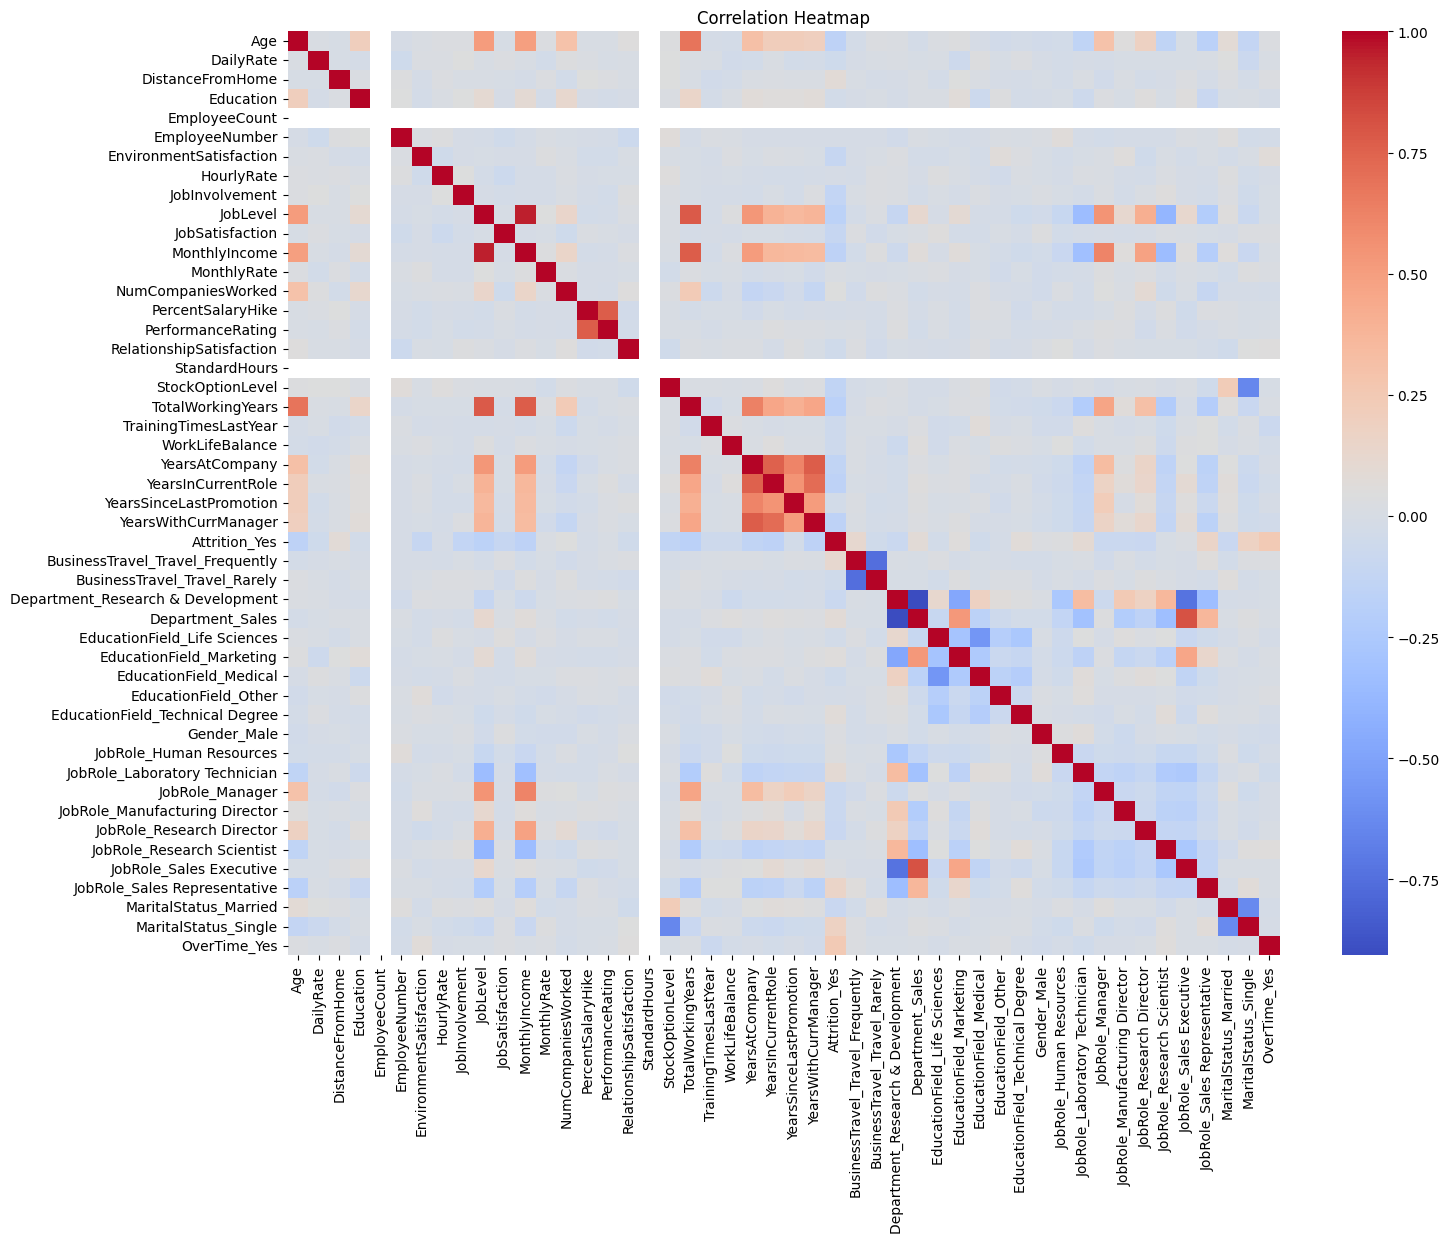

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_encoded.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [20]:
# Get correlation of all features with the target column 'Attrition_Yes'
correlation_with_target = df_encoded.corr()['Attrition_Yes'].sort_values(ascending=False)

# Display the result
print(correlation_with_target)


Attrition_Yes                        1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
EmployeeNumber                      -0.010577
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                         

In [20]:
df_encoded.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728,0.282993
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.498387,0.466530,0.450606
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [21]:
display(df_encoded.columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufactur

In [22]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.6/680.6 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 15.3 MB/s eta 0:00:00


In [23]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from lazypredict.Supervised import LazyClassifier
import pandas as pd

# Step 2: Define feature and target columns
features = [
    'Age','DistanceFromHome', 'Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
    'PerformanceRating', 'RelationshipSatisfaction','TotalWorkingYears', 'WorkLifeBalance',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
    'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical',
    'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male',
    'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager',
    'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist',
    'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married',
    'MaritalStatus_Single', 'OverTime_Yes'
]
target = 'Attrition_Yes'

# Step 3: Split majority and minority classes
df_majority = df_encoded[df_encoded[target] == 0]
df_minority = df_encoded[df_encoded[target] == 1]

# Step 4: Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Step 5: Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Step 6: Split into X and y
X = df_balanced[features]
y = df_balanced[target]

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 8: Run LazyPredict
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Step 9: Display Results
print(models)


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 190, number of negative: 189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 379, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501319 -> initscore=0.005277
[LightGBM] [Info] Start training from score 0.005277
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

Accuracy: 0.7368

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.67      0.72        48
           1       0.70      0.81      0.75        47

    accuracy                           0.74        95
   macro avg       0.74      0.74      0.74        95
weighted avg       0.74      0.74      0.74        95



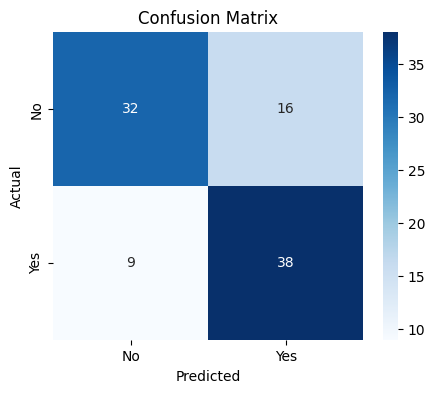

In [24]:
# Step 1: Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Step 3: Fit the model on the training data
log_reg.fit(X_train, y_train)

# Step 4: Predict on the test data
y_pred = log_reg.predict(X_test)

# Step 5: Evaluate the model

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [28]:
from google.colab import files

# Export the DataFrame to a CSV file
df_encoded.to_csv('df_encoded.csv', index=False)

# Download the CSV file
files.download('df_encoded.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
df_balanced[df_balanced['Attrition_Yes'] == 0][features].head()


,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
418,26,23,3,1,3,1,4,2886,1,22,...,0,0,0,0,1,0,0,0,0,0
643,42,3,3,3,4,2,4,5231,2,13,...,1,0,0,0,0,0,0,1,0,1
963,38,2,2,2,3,2,1,6893,3,15,...,0,0,0,0,0,1,0,0,0,0
62,50,7,2,2,2,5,3,18740,5,12,...,0,0,0,1,0,0,0,0,0,1
1165,44,1,5,1,3,2,4,5743,4,11,...,0,0,0,0,0,0,0,1,0,1


In [30]:
import pandas as pd

# Ensure all columns are displayed
pd.set_option('display.max_columns', None)

# Display rows from X where Attrition_Yes is 0
df_balanced[df_balanced['Attrition_Yes'] == 0][features].head()


,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
418,26,23,3,1,3,1,4,2886,1,22,4,2,3,1,3,2,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
643,42,3,3,3,4,2,4,5231,2,13,3,2,17,2,5,3,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
963,38,2,2,2,3,2,1,6893,3,15,3,4,11,3,7,7,1,7,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
62,50,7,2,2,2,5,3,18740,5,12,3,4,29,2,27,3,13,8,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1165,44,1,5,1,3,2,4,5743,4,11,3,3,14,3,10,7,0,2,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1


In [32]:
import numpy as np

# Feature values (should match the order of your `features` list exactly)
input_values = np.array([[26, 23, 3, 1, 3, 1, 4, 2886, 1, 22, 4, 2, 3, 1, 3, 2, 0, 2,
                          0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

# Predict class (0 or 1)
prediction = log_reg.predict(input_values)
print("Predicted class (Attrition_Yes):", prediction[0])

# Predict probability (optional)
probability = log_reg.predict_proba(input_values)
print("Probability of [No, Yes]:", probability[0])


Expected features by model: 37
Predicted class (Attrition_Yes): 0
Probability of [No, Yes]: [0.85140462 0.14859538]


In [33]:
import pandas as pd

# Ensure all columns are displayed
pd.set_option('display.max_columns', None)

# Display rows from X where Attrition_Yes is 0
df_balanced[df_balanced['Attrition_Yes'] == 1][features].head()


,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,2,2,3,2,4,5993,8,11,3,1,8,1,6,4,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,37,2,2,4,2,1,3,2090,6,15,3,2,7,3,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
14,28,24,3,3,2,1,3,2028,5,14,3,2,6,3,4,2,0,3,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
21,36,9,4,3,2,1,1,3407,7,23,4,2,10,3,5,3,0,3,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
24,34,6,1,2,3,1,1,2960,2,11,3,3,8,3,4,2,1,3,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [36]:
import numpy as np

# 37 feature values (in correct order)
input_values = np.array([[41, 1, 2, 2, 3, 2, 4, 5993, 8, 11, 3, 1, 8, 1, 6, 4, 0, 5,
                          0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]])

# Predict class (Attrition_Yes: 0 or 1)
prediction = log_reg.predict(input_values)
print("Predicted class (Attrition_Yes):", prediction[0])

# Predict probability
probability = log_reg.predict_proba(input_values)
print("Probability of [No, Yes]:", probability[0])


Predicted class (Attrition_Yes): 1
Probability of [No, Yes]: [0.13228181 0.86771819]


In [37]:
import pickle

# Save the trained model to a file
with open('log_reg.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

print("Model saved as 'log_reg.pkl'")


Model saved as 'log_reg.pkl'
